## dataset

([<matplotlib.axis.XTick at 0x7fe5704e6590>,
 [Text(0, 0, 'minimal'),
  Text(0, 0, 'normal'),
  Text(0, 0, 'empty'),
  Text(0, 0, 'full')])

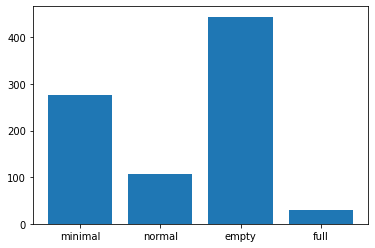

In [5]:
path = "data/classified_data/val"
from glob import glob 
import os

cls2num = {}
for cls_name in os.listdir(path):
  cls2num[cls_name] = len(os.listdir(os.path.join(path, cls_name)))

import matplotlib.pyplot as plt 

plt.bar(range(len(cls2num)), list(cls2num.values()), align='center')
plt.xticks(range(len(cls2num)), list(cls2num.keys()))

## load model

In [8]:
import sys
sys.path.append("/content/feedlane_thucth/timm")
import argparse
import os
import csv
import glob
import json
import time
import logging
import torch
import torch.nn as nn
import torch.nn.parallel
from collections import OrderedDict
from contextlib import suppress

from timm.models import create_model, apply_test_time_pool, load_checkpoint, is_model, list_models
from timm.data import create_dataset, create_loader, resolve_data_config, RealLabelsImagenet
from timm.utils import accuracy, AverageMeter, natural_key, setup_default_logging, set_jit_fuser, visualize, get_pred


model = create_model(
    "efficientnet_b0",
    pretrained= "/content/feedlane_thucth/output/train/20220702-101406-efficientnet_b0-48/model_best.pth.tar",
    num_classes=1,
    in_chans=3,
    global_pool=None)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


In [9]:
model = model.cuda()
criterion = nn.CrossEntropyLoss().cuda()


In [ ]:
dataset = create_dataset(
root=args.data, name=args.dataset, split=args.split,
download=args.dataset_download, load_bytes=args.tf_preprocessing, class_map=args.class_map)
